In [109]:
import pandas as pd

In [110]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [111]:
# map = {
#     "unfinished" : "nao_finalizado"
#     "expected_hours" : "horas_esperadas",
#     "price" : "preco"
# }
# data.rename(columns = map)

In [112]:
swap = {
    0 : 1,
    1 : 0
}
data['finished'] = data.unfinished.map(swap)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [113]:
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

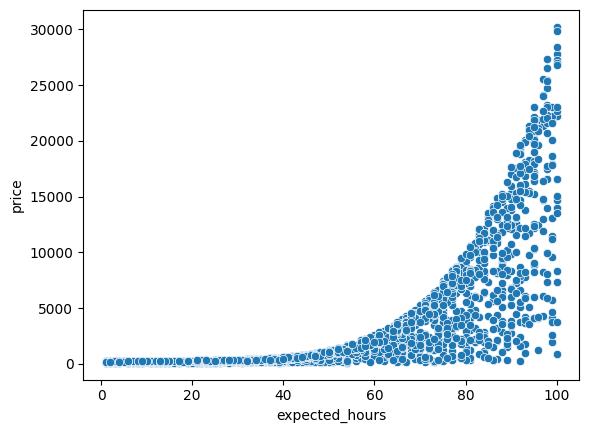

In [114]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data=data)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

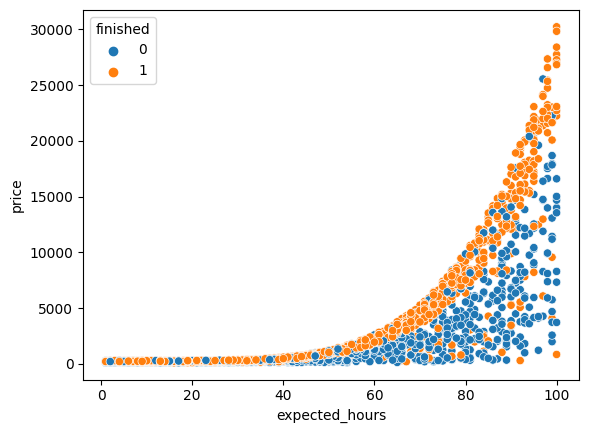

In [115]:
sns.scatterplot(x="expected_hours", y="price", hue="finished", data=data)

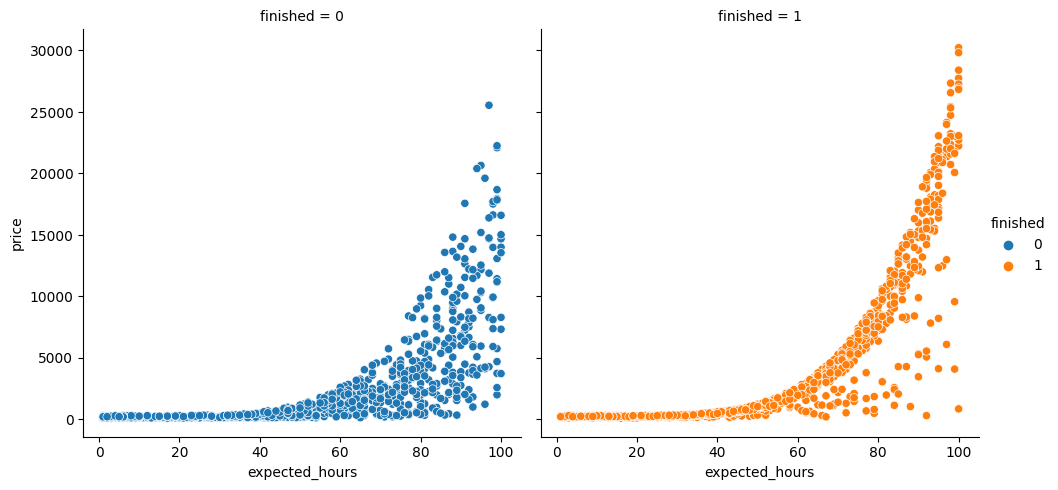

In [116]:
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished", data=data)

In [117]:
x = data[["expected_hours", "price"]]
y = data["finished"]

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [119]:
SEED = 5
np.random.seed(SEED)

# train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("We'll train with %d elements and test with %d elements." % (len(train_x), len(test_x)))

# model = LinearSVC(random_state=SEED)
model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("Accuracy was %2f%%" % accuracy)

We'll train with 1617 elements and test with 540 elements.
Accuracy was 49.259259%


/home/cristoffer_pogan/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [120]:
import numpy as np

base_predictions = np.ones(540)
accuracy = accuracy_score(test_y, base_predictions) * 100
print("Baseline accuracy was %.2f%%" % accuracy)

Baseline accuracy was 52.59%


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

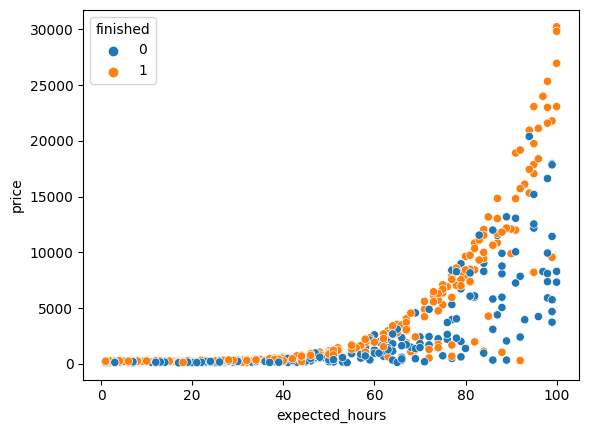

In [121]:
sns.scatterplot(x="expected_hours", y="price", hue=test_y, data=test_x)

In [122]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [123]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [124]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [125]:
z = model.predict(points)
z = z.reshape(xx.shape)
z

/home/cristoffer_pogan/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

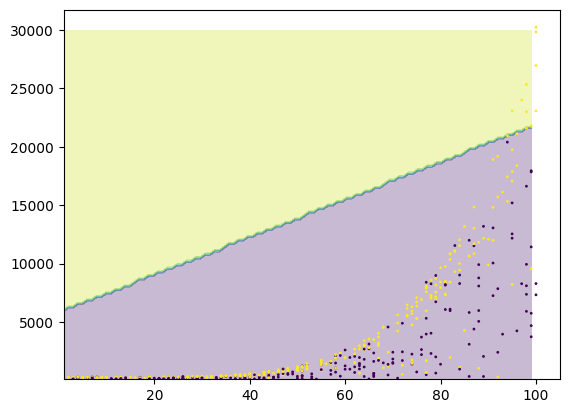

In [126]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

# DECISION BOUNDARY

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [130]:
SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("We'll train with %d elements and test with %d elements." % (len(train_x), len(test_x)))

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("Accuracy was %2f%%" % accuracy)

We'll train with 1617 elements and test with 540 elements.
Accuracy was 55.185185%


/home/cristoffer_pogan/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


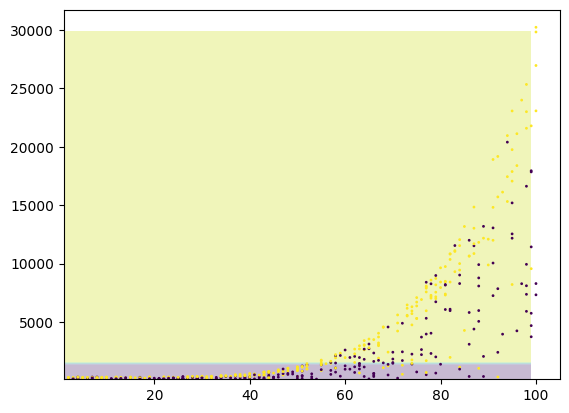

In [132]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

# DECISION BOUNDARY

We'll train with 1617 elements and test with 540 elements.
Accuracy was 66.851852%


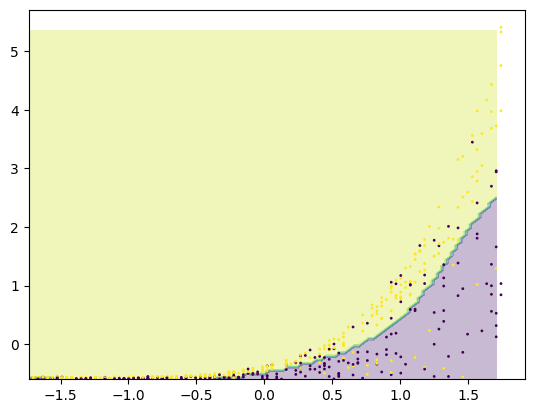

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("We'll train with %d elements and test with %d elements." % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("Accuracy was %2f%%" % accuracy)

data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

# DECISION BOUNDARY